## Monitoring the incidence and management of inflammatory arthritis in England 

Autoimmune inflammatory arthritis (IA) encompasses an overlapping group of conditions that includes rheumatoid arthritis (RA), psoriatic arthritis (PsA), axial spondyloarthritis (axSpA), and undifferentiated IA. Early diagnosis of IA and prompt treatment with disease-modifying anti-rheumatic drugs (DMARDs; e.g. methotrexate) improves outcomes for patients and increases the likelihood of remission.

In England and Wales, the quality of care for people with IA is benchmarked in the [National Early Inflammatory Arthritis Audit](https://www.rheumatology.org.uk/practice-quality/audits/neiaa) (NEIAA). Metrics benchmarked include the time from primary care referral to initial rheumatology assessment, and the time to initiation of a DMARD. However, during the COVID-19 pandemic, mandatory data collection in NEIAA was paused, thereby preventing comparisons of care.

The aim of this report is to use the OpenSAFELY platform to replicate key metrics from NEIAA, and assess the impact of COVID-19 on care for people with new diagnoses of IA in England. The results shown below are from a study population consisting of all patients aged 18 years or above who are registered with a general practice in England that uses TPP health software.

In [1]:
from IPython.display import Image, Markdown
import json
import pandas as pd
import numpy as np
from IPython.display import HTML, display, Markdown
%config InlineBackend.figure_format='png'
%matplotlib inline

### Incidence of inflammatory arthritis diagnoses

This graph shows the monthly incidence of new IA diagnoses in England, corresponding to the appearance of new IA diagnosis codes ([RA](https://www.opencodelists.org/codelist/user/markdrussell/new-rheumatoid-arthritis/535a8249/), [PsA](https://www.opencodelists.org/codelist/user/markdrussell/psoriatic-arthritis/6c69f57e/), [axSpA](https://www.opencodelists.org/codelist/user/markdrussell/axial-spondyloarthritis/057968b4/), [undifferentiated IA](https://www.opencodelists.org/codelist/user/markdrussell/undiff-eia/459a5829/)) in patients' primary care records between 1 April 2019 and 31 March 2023. The denominator for calculating diagnostic incidence was all adults registered with a TPP general practice as of 1 April 2019 (17.7 million). The vertical hashed line in the graph corresponds to the start of the first COVID-19 lockdown in England (March 2020).
<br/>

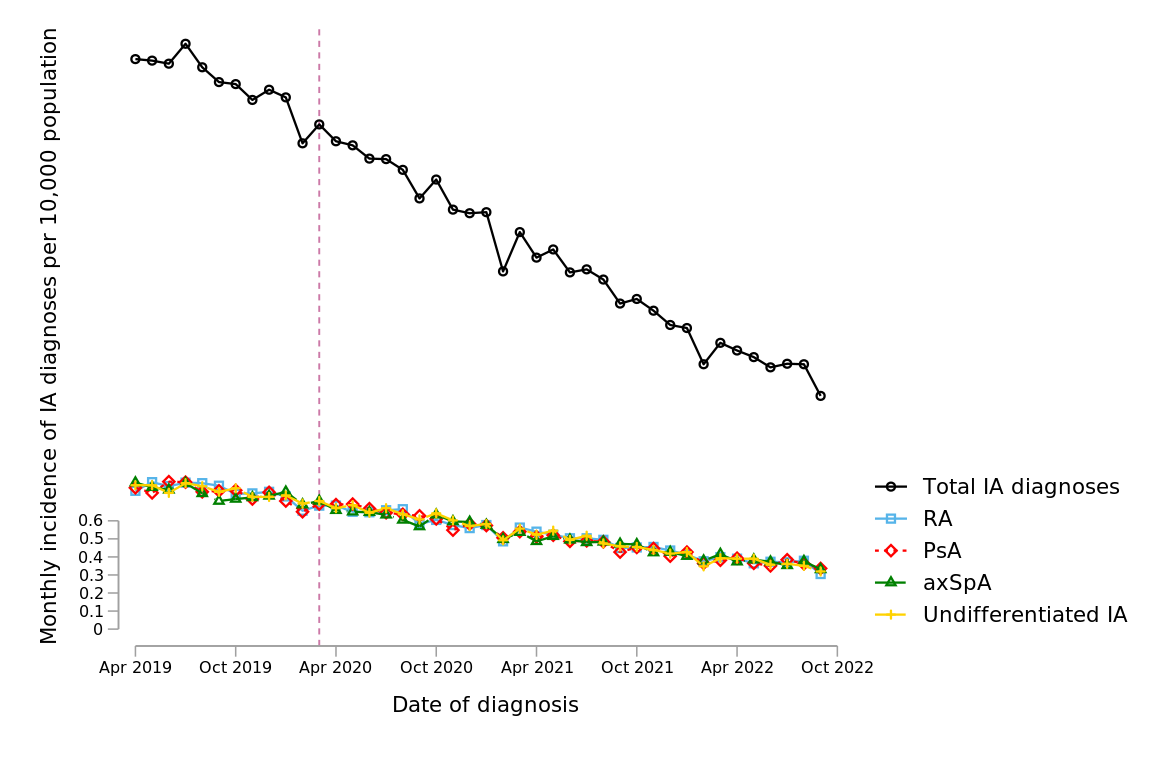

In [11]:
Image(filename="../output/figures/incidence_twoway_rounded.png", width=1200)

The table below summarises the number of new IA diagnoses and corresponding diagnostic incidence (per 10,000 adult population), by year of diagnosis.
<br/>

In [3]:
table = pd.read_csv("../output/tables/diag_count_byyear.csv")
table_subset = table.loc[[0, 1, 2, 3], ["total_diag_round", "incidence_total_diag_round", "ra_diag_round", "incidence_ra_diag_round", "psa_diag_round", "incidence_psa_diag_round", "axspa_diag_round", "incidence_axspa_diag_round", "undiff_diag_round", "incidence_undiff_diag_round"]]
table_subset[["incidence_total_diag_round", "incidence_ra_diag_round", "incidence_psa_diag_round", "incidence_axspa_diag_round", "incidence_undiff_diag_round"]] = table_subset[["incidence_total_diag_round", "incidence_ra_diag_round", "incidence_psa_diag_round", "incidence_axspa_diag_round", "incidence_undiff_diag_round"]].astype(float).round(2)
table_subset.columns = pd.MultiIndex.from_tuples([('All IA diagnoses', 'total_diag_round'), ('All IA diagnoses', 'incidence_total_diag_round'), ('Rheumatoid arthritis', 'ra_diag_round'), ('Rheumatoid arthritis', 'incidence_ra_diag_round'), ('Psoriatic arthritis', 'psa_diag_round'), ('Psoriatic arthritis', 'incidence_psa_diag_round'), ('Axial spondyloarthritis', 'axspa_diag_round'), ('Axial spondyloarthritis', 'incidence_axspa_diag_round'), ('Undifferentiated IA', 'undiff_diag_round'), ('Undifferentiated IA', 'incidence_undiff_diag_round')])
table_subset.rename(columns = {'diagnosis_year':'Diagnosis year', 'total_diag_round':'Count', 'incidence_total_diag_round':'Incidence', 'ra_diag_round':'Count', 'incidence_ra_diag_round':'Incidence', 'psa_diag_round':'Count', 'incidence_psa_diag_round':'Incidence', 'axspa_diag_round':'Count', 'incidence_axspa_diag_round':'Incidence', 'undiff_diag_round':'Count', 'incidence_undiff_diag_round':'Incidence'}, inplace = True)
table_subset.rename(index = {0:'April 2019/20', 1:'April 2020/21', 2:'April 2021/22', 3:'April 2022/23'}, inplace = True)
display(
    HTML(table_subset.to_html(index=True)),
    )

### Time to initial rheumatology assessment

#### National trends

The table below summarises the median time, in days, from primary care referral to first assessment by a rheumatology specialist for people with new IA diagnoses, separated by date of diagnosis and by disease subtype.

Data are shown for all patients with new IA diagnoses who had their first rheumatology outpatient appointment captured and who had a minimum of 6 months of available follow-up (from 1 April 2019 to 30 September 2022). Rheumatology outpatient clinics were defined by the presence of a ['410' treatment function code](https://www.datadictionary.nhs.uk/attributes/treatment_function_code.html). A proxy of primary care referral date was used, defined as the last primary care appointment before the first rheumatology appointment.
<br/>

In [9]:
table = pd.read_csv("../output/tables/table_median_bydiag_rounded_to21_report.csv")
table_subset = table.iloc[[0,1,2,3,4], [3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]]
table_subset.columns = pd.MultiIndex.from_tuples([('', 3), ('', 5), ('', 7), ('', 9), ('Median time to rheumatology assessment (days)', 11), ('Median time to rheumatology assessment (days)', 13), ('Median time to rheumatology assessment (days)', 15), ('Median time to rheumatology assessment (days)', 17), ('Median time to rheumatology assessment (days)', 19), ('Median time to rheumatology assessment (days)', 21), ('Median time to rheumatology assessment (days)', 23), ('Median time to rheumatology assessment (days)', 25), ('Median time to rheumatology assessment (days)', 27), ('Median time to rheumatology assessment (days)', 29), ('Median time to rheumatology assessment (days)', 31)])
table_subset.rename(columns = {3:'Overall', 5:"Apr 2019-Jun 2019", 7:"Jul 2019-Sep 2019", 9:"Oct 2019-Dec 2019", 11:"Jan 2020-Mar 2020", 13:"Apr 2020-Jun 2020", 15:"Jul 2020-Sep 2020", 17:"Oct 2020-Dec 2020", 19:"Jan 2021-Mar 2021", 21:"Apr 2021-Jun 2021", 23:"Jul 2021-Sep 2021", 25:"Oct 2021-Dec 2021", 27:"Jan 2022-Mar 2022", 29:"Apr 2022-Jun 2022", 31:"Jul 2022-Sep 2022"}, inplace = True)
table_subset.rename(index = {0:'All IA diagnoses', 1:'Rheumatoid arthritis', 2:'Psoriatic arthritis', 3:'Axial spondyloarthritis', 4:'Undifferentiated IA'}, inplace = True)
display(
    HTML(table_subset.to_html(index=True)),
    )



The graph below shows the proportion of patients who received their first rheumatology assessment within 3 weeks of primary care referral. The 3-week target is recommended in national guidelines ([NICE](https://www.nice.org.uk/guidance/qs33)). Trends during each full-year period from April are shown. 
<br/>

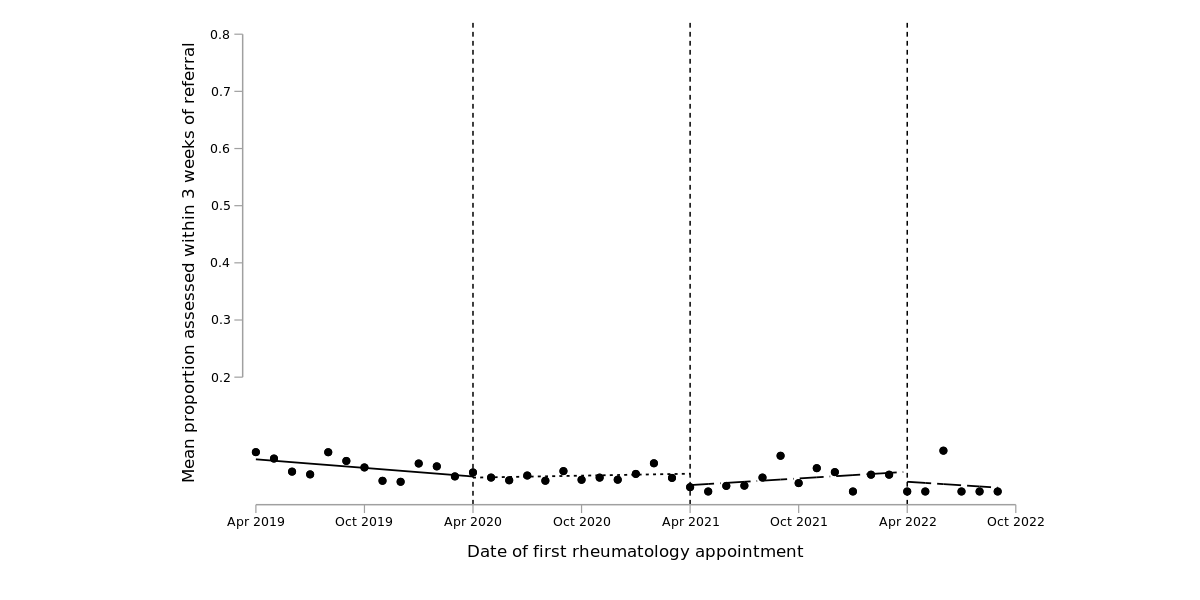

In [10]:

Image(filename="../output/figures/ITSA_diagnostic_delay_GP_newey.png", width=1200)

#### Regional trends

Summarised below is the regional variation in rheumatology assessment times for new IA patients. Results are compared by time period: Year 1 (1 April 2019 to 31 March 2020); Year 2 (1 April 2020 to 31 March 2021); Year 3 (1 April 2021 to 31 March 2022); and Year 4 (1 April 2022 to 30 September 2022).
<br/>

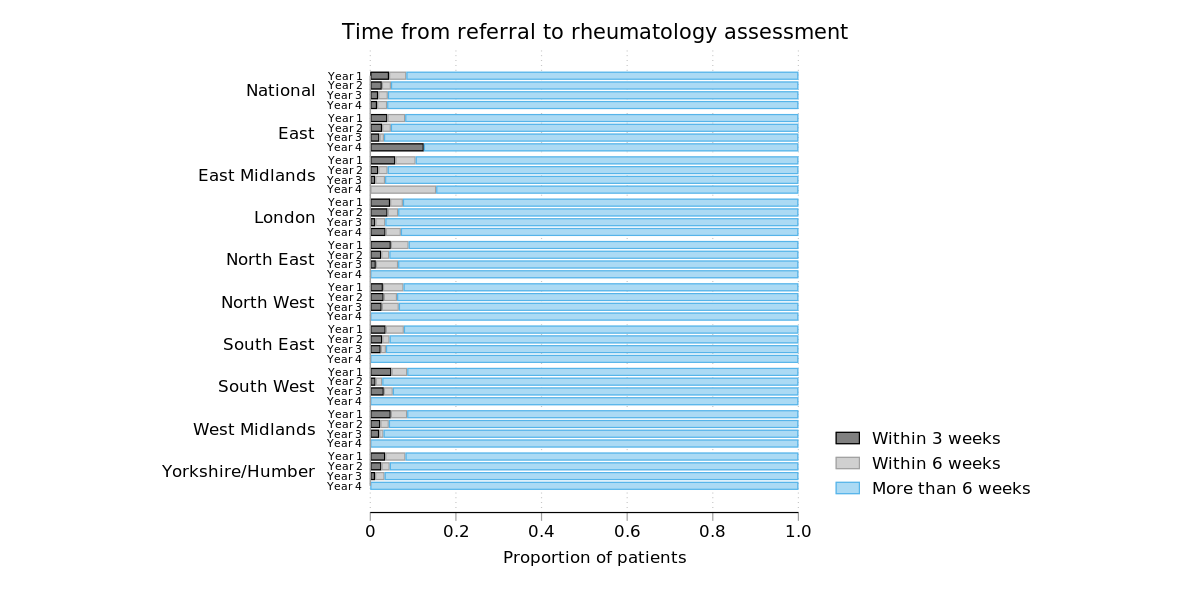

In [11]:
Image(filename="../output/figures/regional_qs2_bar_GP_merged.png", width=1200)

### Time to prescription of a DMARD in primary care

#### National trends

The graph below shows the proportion of patients who were prescribed conventional synthetic DMARDs (csDMARDs: methotrexate, leflunomide, sulfasalazine or hydroxychloroquine) in primary care within 6 months of their first rheumatology appointment. Trends during each full-year period from April are shown. Decreases were observed in March 2020 and April 2020, corresponding to the start of the first COVID-19 lockdown in England.

Data are shown for all patients with new diagnoses of RA, PsA or undifferentiated IA who had their first rheumatology appointment captured and a minimum of 6 months of available follow-up (from 1 April 2019 to 30 September 2022). Data for patients with axSpA are not included, due to small numbers of these patients receiving csDMARDs. Only primary care-issued prescriptions for DMARDs are captured, representing shared-care prescribing between primary care and secondary care clinicians; secondary care-issued prescriptions are not currently captured. 
<br/>

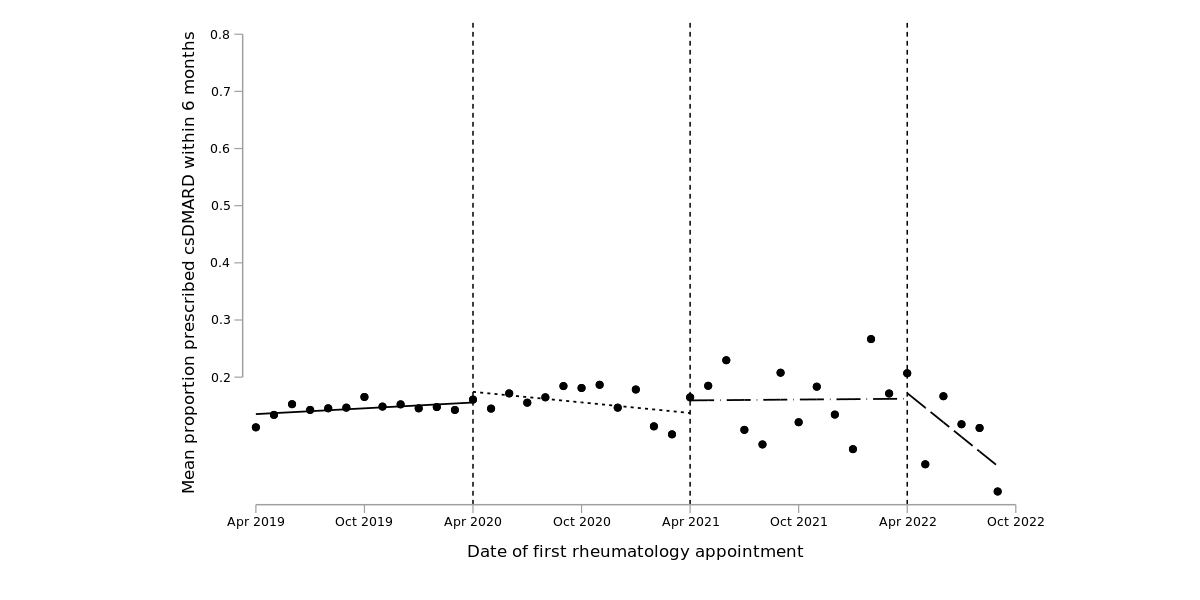

In [12]:
Image(filename="../output/figures/ITSA_csDMARD_delay_newey.png", width=1200)

#### Regional trends

Summarised below is the regional variation in time to first csDMARD prescription in primary care. Results are compared by time period: Year 1 (1 April 2019 to 31 March 2020); Year 2 (1 April 2020 to 31 March 2021); Year 3 (1 April 2021 to 31 March 2022); and Year 4 (1 April 2022 to 30 September 2022).
<br/>

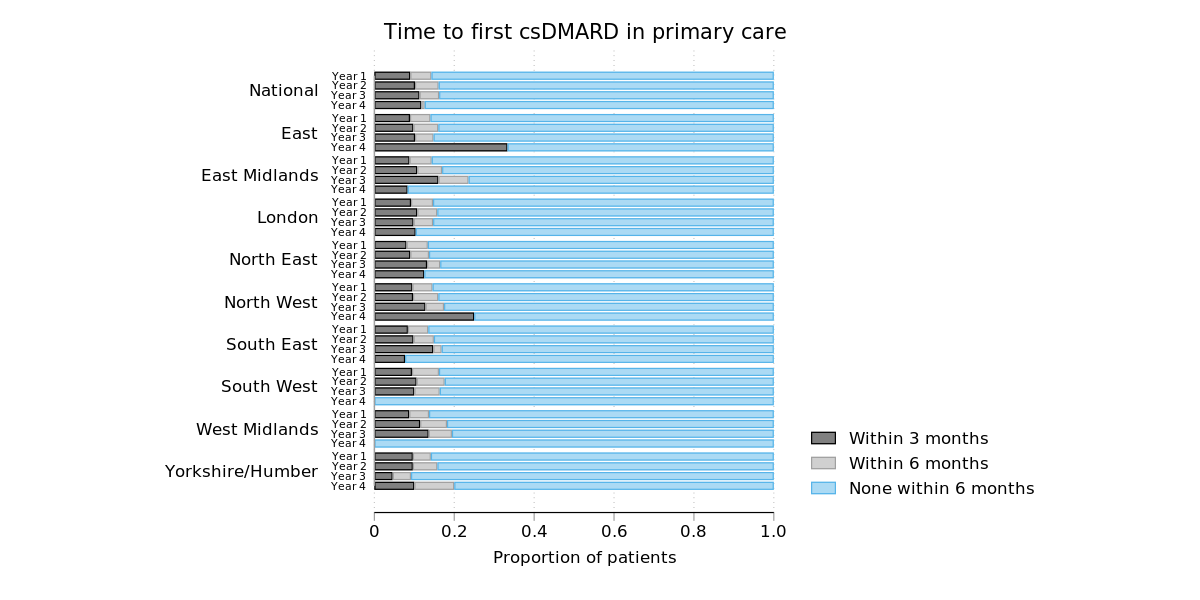

In [13]:
Image(filename="../output/figures/regional_csdmard_bar_merged.png", width=1200)

### Choice of first DMARD

The table below shows the choice of first DMARD for IA patients who were prescribed at least one csDMARD in primary care within 6 months of diagnosis. 

Data are shown for patients with new diagnoses of RA, PsA or undifferentiated IA who had their first rheumatology appointment captured and a minimum of 6 months of available follow-up (from 1 April 2019 to 30 September 2022). Data for patients with axSpA are not included, due to small numbers of these patients receiving csDMARDs. Similarly, prescriptions for leflunomide are not shown, as these represent <2% of DMARD prescriptions. Only primary care-issued prescriptions for DMARDs are captured, representing shared-care prescribing between primary and secondary care clinicians; secondary care-issued prescriptions are not currently captured.
<br/>

In [7]:
table = pd.read_csv("../output/tables/first_csdmard_rounded_report.csv")
table_subset = table.iloc[[1,2,0], [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]]

table_subset.rename(index = {0:'Hydroxychloroquine', 1:'Methotrexate', 2:'Sulfasalazine'}, inplace = True)
table_subset.columns = pd.MultiIndex.from_tuples([('', 2), ('', 4), ('', 6), ('', 8), ('First csDMARD prescribed in primary care (%)', 10), ('First csDMARD prescribed in primary care (%)', 12), ('First csDMARD prescribed in primary care (%)', 14), ('First csDMARD prescribed in primary care (%)', 16), ('First csDMARD prescribed in primary care (%)', 18), ('First csDMARD prescribed in primary care (%)', 20), ('First csDMARD prescribed in primary care (%)', 22), ('First csDMARD prescribed in primary care (%)', 24), ('First csDMARD prescribed in primary care (%)', 26), ('First csDMARD prescribed in primary care (%)', 28), ('First csDMARD prescribed in primary care (%)', 30)])
table_subset.rename(columns = {2:'Overall', 4:"Apr 2019-Jun 2019", 6:"Jul 2019-Sep 2019", 8:"Oct 2019-Dec 2019", 10:"Jan 2020-Mar 2020", 12:"Apr 2020-Jun 2020", 14:"Jul 2020-Sep 2020", 16:"Oct 2020-Dec 2020", 18:"Jan 2021-Mar 2021", 20:"Apr 2021-Jun 2021", 22:"Jul 2021-Sep 2021", 24:"Oct 2021-Dec 2021", 26:"Jan 2022-Mar 2022", 28:"Apr 2022-Jun 2022", 30:"Jul 2022-Sep 2022"}, inplace = True)

display(
  HTML(table_subset.to_html(index=True)),
   )